#### Filter the biom table
[dada_table.no_water_or_ntc.min2.qzv](https://view.qiime2.org/visualization/?type=html&src=https%3A%2F%2Fdl.dropbox.com%2Fs%2Fmslf9zg1c06f5gg%2Fdada_table.no_water_or_ntc.min2.qzv%3Fdl%3D1)  
[dada_table.no_ntc.min2.qzv](https://view.qiime2.org/visualization/?type=html&src=https%3A%2F%2Fdl.dropbox.com%2Fs%2Frj087xzldjftm4d%2Fdada_table.no_ntc.min2.qzv%3Fdl%3D1)

In [ ]:
%%bash

source activate qiime2-2019.4

# Remove Mitochondria, Chloroplast
qiime taxa filter-table \
  --i-table dada_table.qza \
  --i-taxonomy dada_taxa.qza \
  --p-exclude Mitochondria,Chloroplast,Eukaryota \
  --o-filtered-table temp.qza

# Remove low frequency features
qiime feature-table filter-features \
  --i-table temp.qza \
  --p-min-frequency 100 \
  --o-filtered-table temp.qza

# Make a file of swab samples with 1000 seqs at least
qiime feature-table filter-samples \
  --i-table temp.qza \
  --m-metadata-file fish_samples_metadata.tsv\
  --p-where "family_or_tribe NOT IN ('Water', 'NTC-1','NTC-2')" \
  --p-min-frequency 1000 \
  --o-filtered-table dada_table.no_water_or_ntc.qza

# Make a file of swab and water samples with 1000 seqs at least
qiime feature-table filter-samples \
  --i-table temp.qza \
  --m-metadata-file fish_samples_metadata.tsv \
  --p-where "family_or_tribe NOT IN ('NTC-1','NTC-2')" \
  --p-min-frequency 1000 \
  --o-filtered-table dada_table.no_ntc.qza

# excluse singleton features
qiime feature-table filter-features \
  --i-table dada_table.no_water_or_ntc.qza \
  --p-min-samples 2 \
  --o-filtered-table dada_table.no_water_or_ntc.min2.qza

qiime feature-table filter-features \
  --i-table dada_table.no_ntc.qza \
  --p-min-samples 2 \
  --o-filtered-table dada_table.no_ntc.min2.qza

# Create QZVs
qiime feature-table summarize \
  --i-table dada_table.no_water_or_ntc.min2.qza \
  --o-visualization dada_table.no_water_or_ntc.min2.qzv

qiime feature-table summarize \
  --i-table dada_table.no_ntc.min2.qza \
  --o-visualization dada_table.no_ntc.min2.qzv

rm temp.qza

#### Make representative sequences tree

In [ ]:
%%bash

source activate qiime2-2019.4

qiime phylogeny align-to-tree-mafft-fasttree \
  --i-sequences dada-rep-seqs.qza \
  --o-alignment aligned-rep-seqs.qza \
  --o-masked-alignment masked-aligned-rep-seqs.qza \
  --o-tree unrooted-tree.qza \
  --p-n-threads 8 \
  --o-rooted-tree rooted-tree.qza

#### Make Rarefaction curve
[On Qiime2 view](https://view.qiime2.org/visualization/?type=html&src=https%3A%2F%2Fdl.dropbox.com%2Fs%2F545vqdr9ha760fk%2Frarefaction_curve.qzv%3Fdl%3D1)

In [ ]:
%%bash

mkdir alpha-diversity

source activate qiime2-2018.11

qiime diversity alpha-rarefaction \
 --i-table dada_table.no_ntc.min2.qza \
 --p-max-depth 6000 \
 --i-phylogeny rooted-tree.qza \
 --m-metadata-file fish_samples_metadata.tsv \
 --p-steps 20 \
 --o-visualization alpha-diversity/rarefaction_curve.qzv

#### Alpha diversity

In [ ]:
%%bash

source activate qiime2-2019.4

qiime diversity alpha-phylogenetic \
 --i-table dada_table.no_ntc.min2.qza \
 --i-phylogeny rooted-tree.qza \
 --p-metric faith_pd \
 --o-alpha-diversity alpha-diversity/faith_pd-vector.qza

qiime diversity alpha \
  --i-table dada_table.no_ntc.min2.qza \
  -p-metric shannon \
  --o-alpha-diversity alpha-diversity/shannon-vector.qza

qiime diversity alpha \
  --i-table dada_table.no_ntc.min2.qza \
  -p-metric fisher_alpha \
  --o-alpha-diversity alpha-diversity/fisher_alpha-vector.qza

qiime diversity alpha \
  --i-table dada_table.no_ntc.min2.qza \
  -p-metric simpson_e \
  --o-alpha-diversity alpha-diversity/simpson_e-vector.qza

qiime diversity alpha \
  --i-table dada_table.no_ntc.min2.qza \
  -p-metric observed_otus \
  --o-alpha-diversity alpha-diversity/observed_otus-vector.qza

#### Calculate distance matrices on all data

In [2]:
%%bash

source activate qiime2-2019.4

qiime diversity core-metrics-phylogenetic \
  --i-table dada_table.no_ntc.min2.qza \
  --p-sampling-depth 1000 \
  --i-phylogeny rooted-tree.qza \
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --output-dir  core-metrics-results

#### PCoA interaction with conductivity

[Jaccard](https://view.qiime2.org/visualization/?type=html&src=https%3A%2F%2Fdl.dropbox.com%2Fs%2Fe3lfe1hmtoq8iin%2Fconductivity_jaccard_emperor.qzv%3Fdl%3D1)  
[Weighted_unifrac](https://view.qiime2.org/visualization/?type=html&src=https%3A%2F%2Fdl.dropbox.com%2Fs%2F2ly143vwqvnnkvs%2Fconductivity_weighted_unifrac_emperor.qzv%3Fdl%3D1)

In [ ]:
%%bash

source activate qiime2-2019.4

qiime emperor plot \
  --i-pcoa core-metrics-results/jaccard_pcoa_results.qza \
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --p-custom-axes Conductivity \
  --o-visualization core-metrics-results/conductivity_jaccard_emperor.qzv

qiime emperor plot \
  --i-pcoa core-metrics-results/unweighted_unifrac_pcoa_results.qza \
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --p-custom-axes Conductivity \
  --o-visualization core-metrics-results/conductivity_unweighted_unifrac_emperor.qzv

qiime emperor plot \
  --i-pcoa core-metrics-results/weighted_unifrac_pcoa_results.qza \
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --p-custom-axes Conductivity \
  --o-visualization core-metrics-results/conductivity_weighted_unifrac_emperor.qzv

*Legend:*  
**Sample type**  
Sphere: Water  
Ring: Fish swab  
**Conductivity**  
Yellow: 286 microsiemens  
Purple: 3917 microsiemens

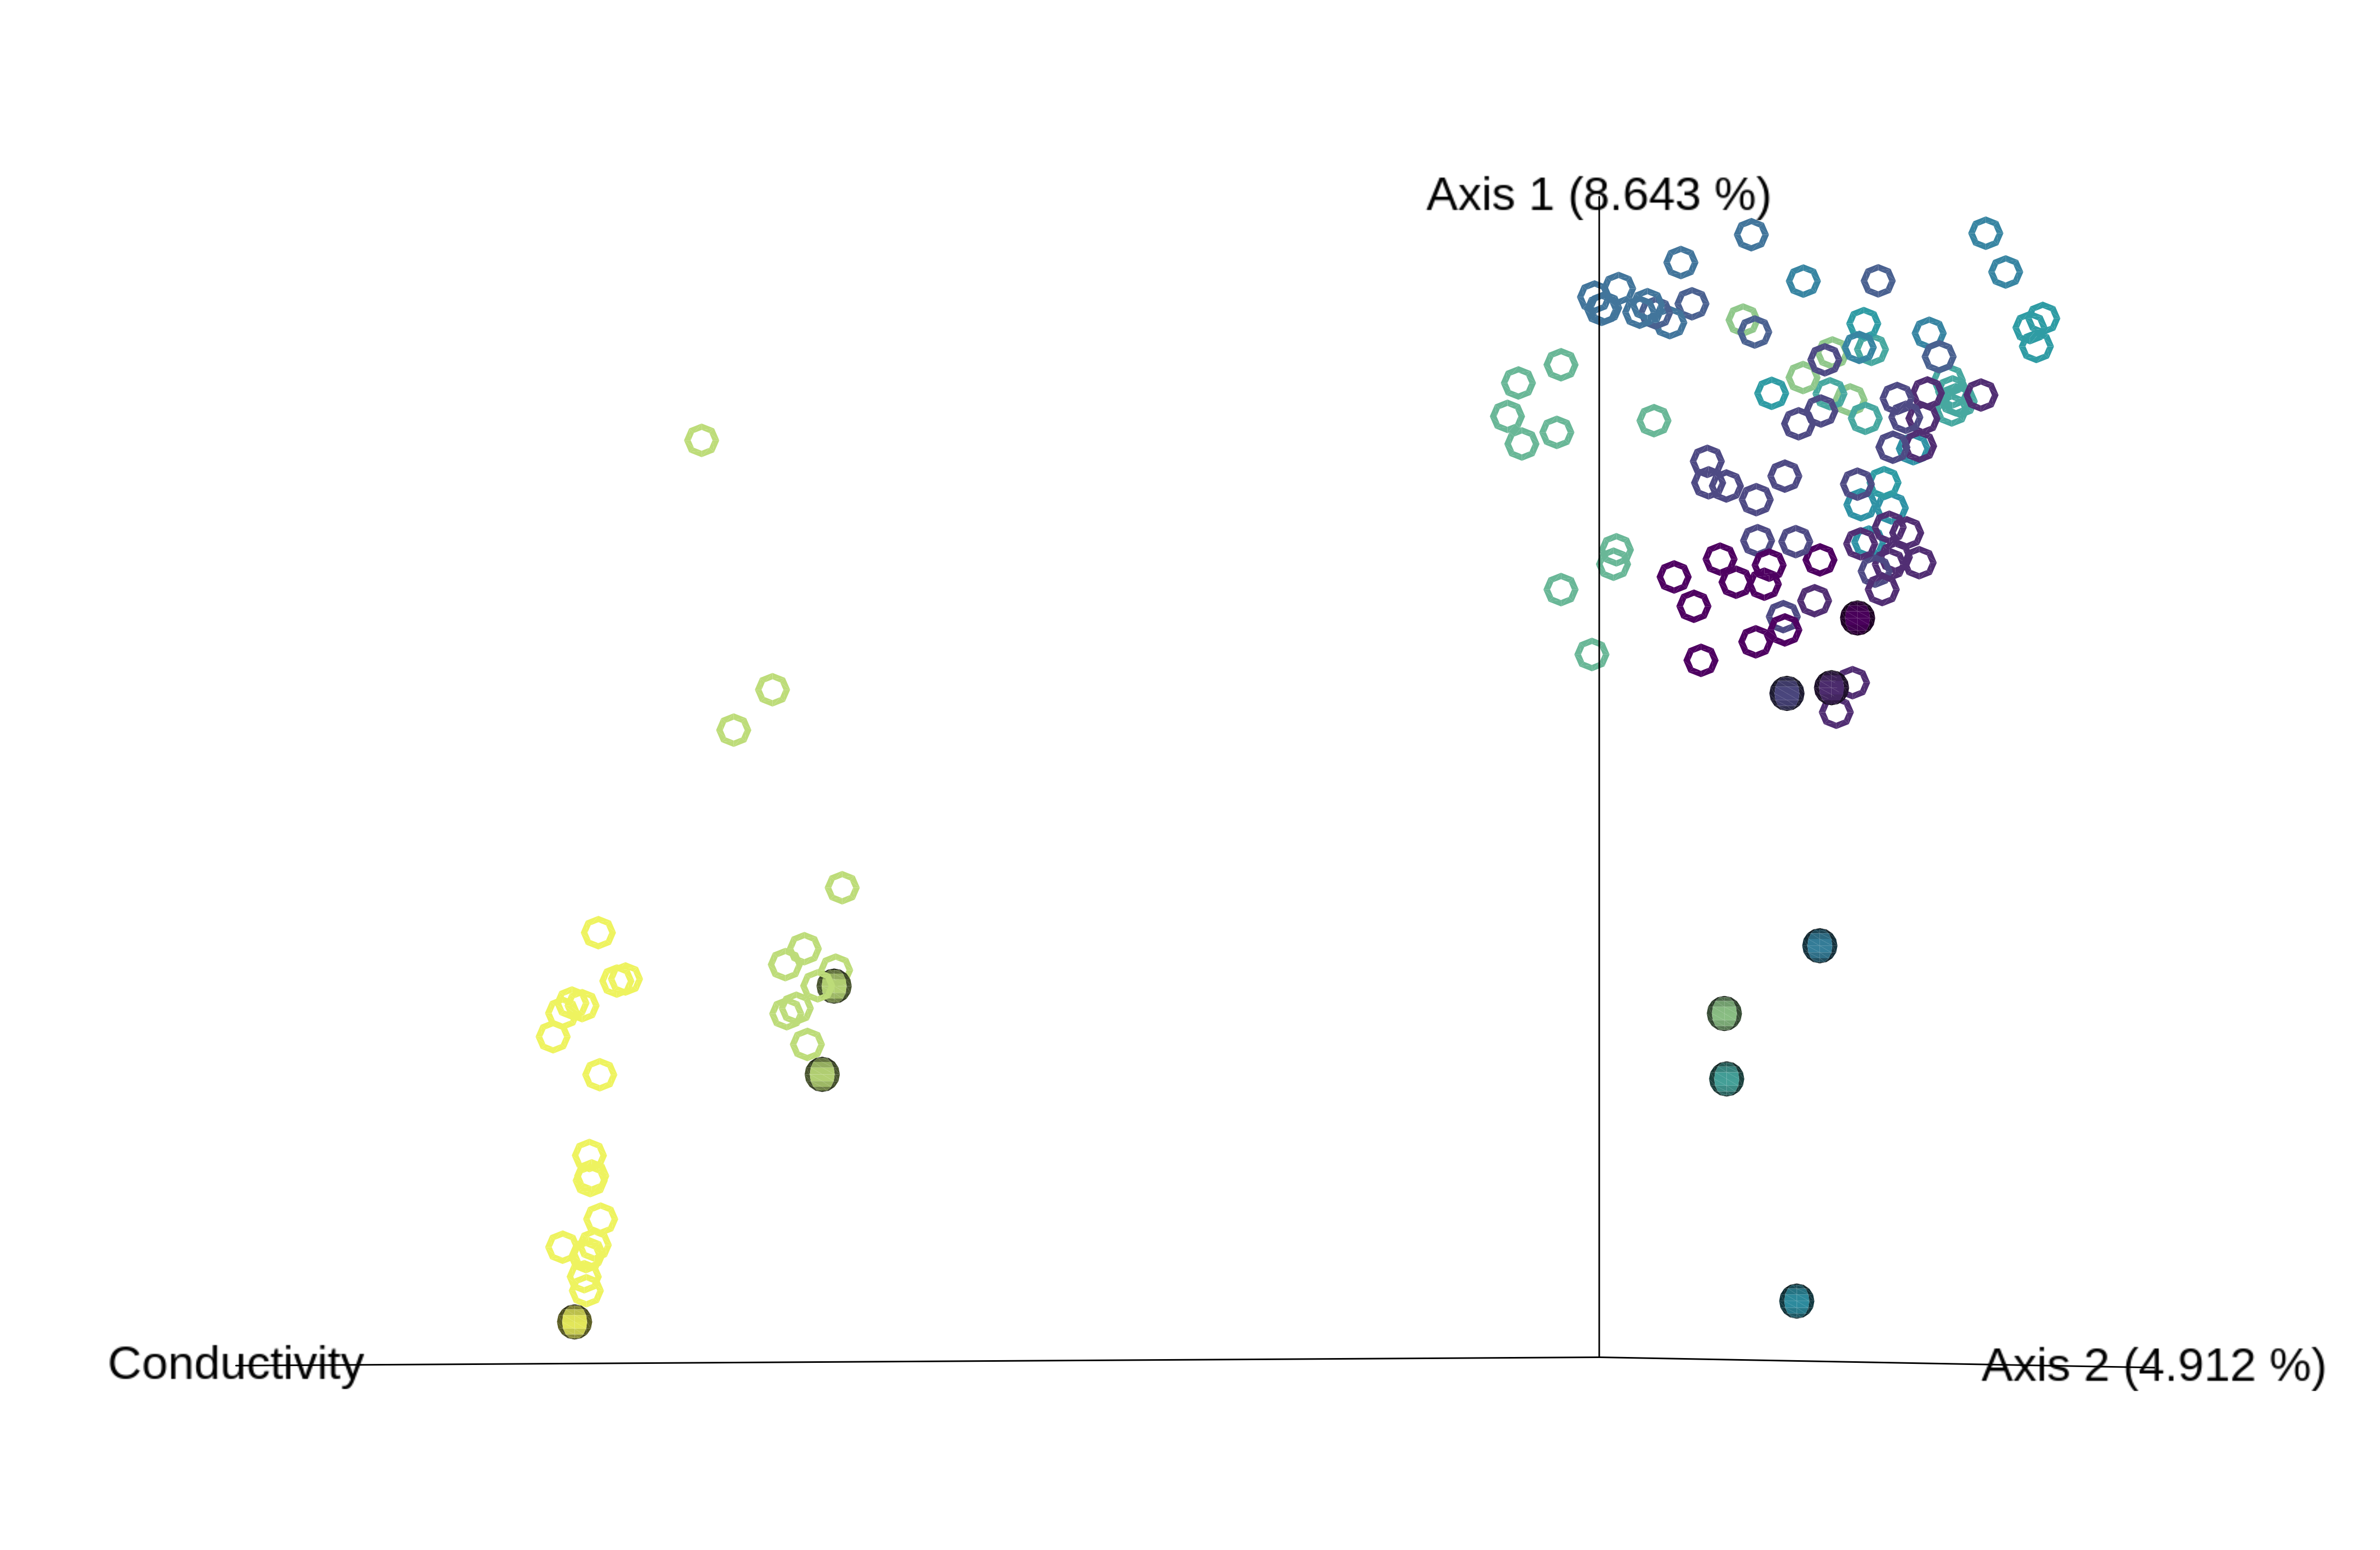

In [3]:
from IPython.display import Image
Image('core-metrics-results/jaccard_conductivity.png')

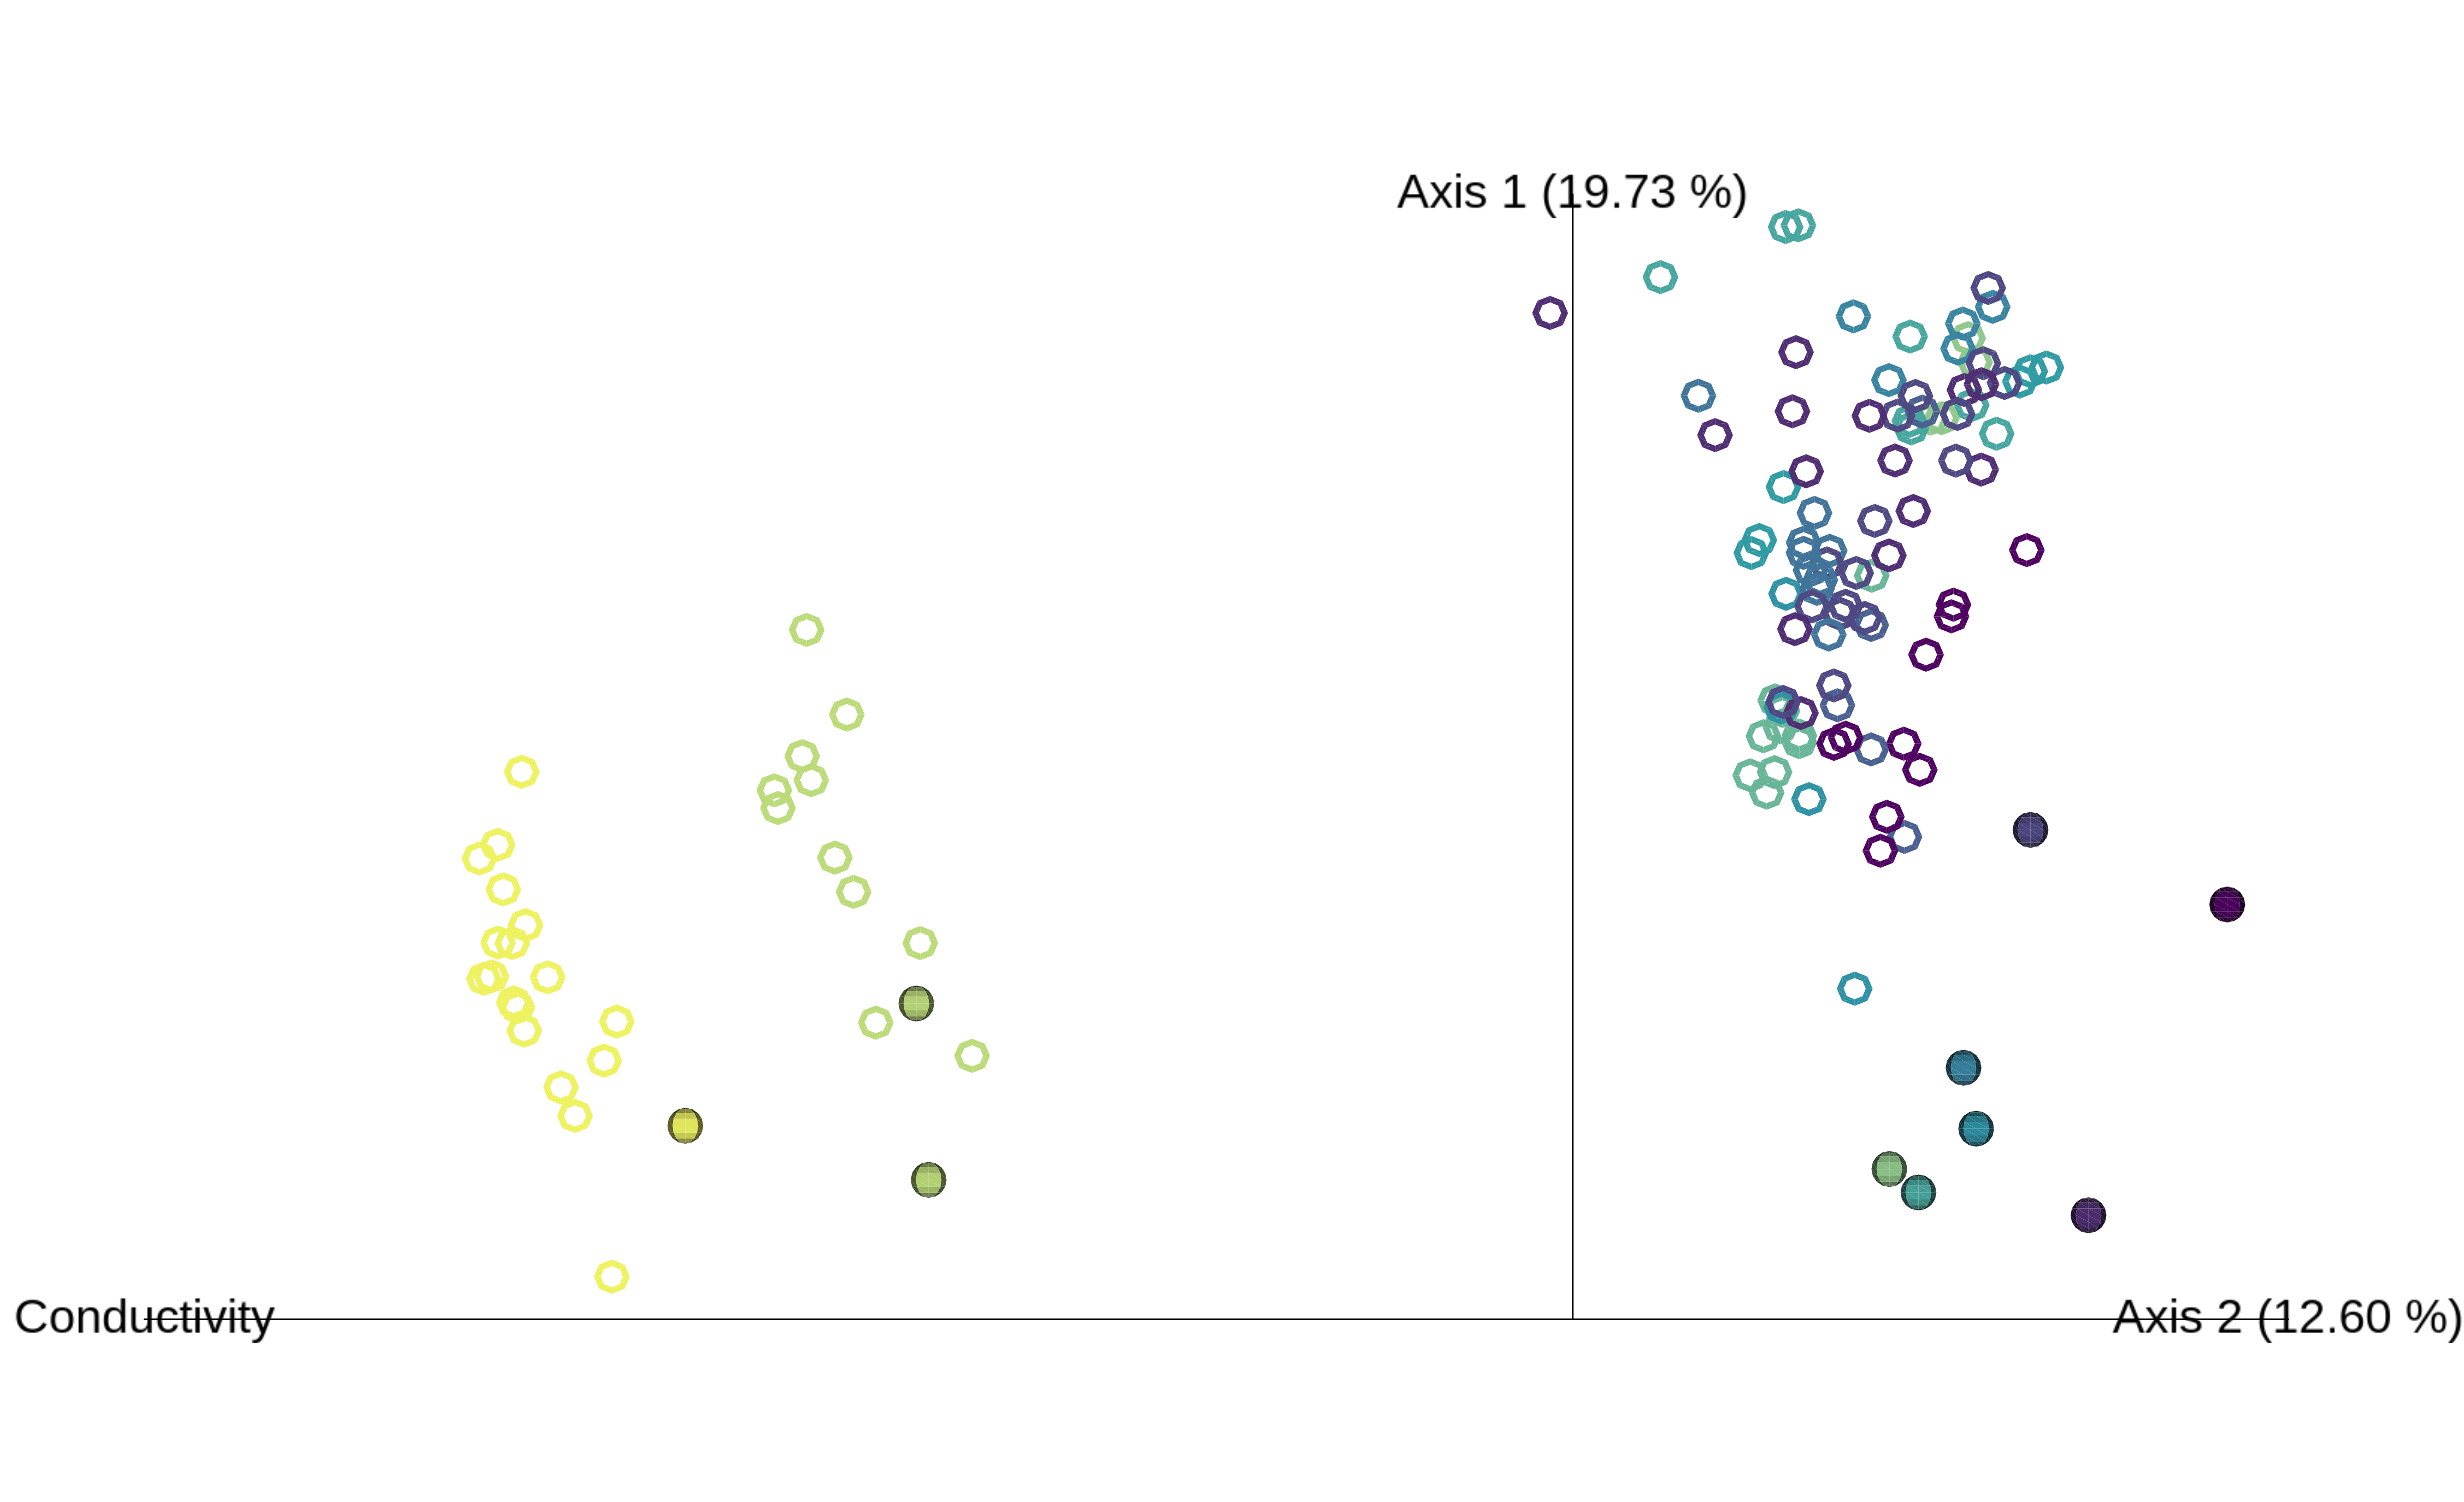

In [5]:
from IPython.display import Image
Image('core-metrics-results/weighted_unifrac_conductivity.png')

#### Create biplots to investigate differences between water and swab samples

In [7]:
%%bash

source activate qiime2-2019.4

qiime feature-table filter-samples \
  --i-table dada_table.no_ntc.min2.qza \
  --p-min-frequency 1000 \
  --o-filtered-table temp.qza

qiime feature-table relative-frequency \
 --i-table temp.qza \
 --o-relative-frequency-table temp.qza 

qiime diversity pcoa-biplot \
  --i-pcoa core-metrics-results/jaccard_pcoa_results.qza \
  --i-features temp.qza \
  --o-biplot core-metrics-results/jaccard_pcoa_results_biplot.qza

qiime diversity pcoa-biplot \
  --i-pcoa core-metrics-results/weighted_unifrac_pcoa_results.qza \
  --i-features temp.qza \
  --o-biplot core-metrics-results/weighted_unifrac_pcoa_results_biplot.qza

rm temp.qza

Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[RelativeFrequency] to: temp.qza
Saved PCoAResults % Properties('biplot') to: core-metrics-results/jaccard_pcoa_results_biplot.qza
Saved PCoAResults % Properties('biplot') to: core-metrics-results/weighted_unifrac_pcoa_results_biplot.qza


#### Create North and South swab tables

In [12]:
%%bash

source activate qiime2-2019.4

qiime feature-table filter-samples \
  --i-table dada_table.no_water_or_ntc.min2.qza \
  --m-metadata-file fish_samples_metadata_loc_code.tsv \
  --p-where "Basin IN ('N')" \
  --p-min-frequency 900 \
  --o-filtered-table dada_table.no_water_or_ntc_N.min2.qza

qiime feature-table filter-samples \
  --i-table dada_table.no_water_or_ntc.min2.qza \
  --m-metadata-file fish_samples_metadata_loc_code.tsv \
  --p-where "Basin IN ('S')" \
  --p-min-frequency 900 \
  --o-filtered-table dada_table.no_water_or_ntc_S.min2.qza

Saved FeatureTable[Frequency] to: dada_table.no_water_or_ntc_N.min2.qza
Saved FeatureTable[Frequency] to: dada_table.no_water_or_ntc_S.min2.qza


#### Create North and South swab distance matrices, PCoA and BiPlots

In [13]:
%%bash

source activate qiime2-2019.4

# North

qiime diversity core-metrics-phylogenetic \
  --i-table dada_table.no_water_or_ntc_N.min2.qza \
  --i-phylogeny rooted-tree.qza \
  --p-sampling-depth 899 \
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --output-dir core-metrics-results-North

qiime feature-table relative-frequency \
 --i-table dada_table.no_water_or_ntc_N.min2.qza \
 --o-relative-frequency-table temp.qza 

qiime diversity pcoa-biplot \
  --i-pcoa core-metrics-results-North/unweighted_unifrac_pcoa_results.qza \
  --i-features temp.qza \
  --o-biplot core-metrics-results-North/unweighted_unifrac_pcoa_results_biplot.qza

rm temp.qza

# South

qiime diversity core-metrics-phylogenetic \
  --i-table dada_table.no_water_or_ntc_S.min2.qza \
  --i-phylogeny rooted-tree.qza \
  --p-sampling-depth 899 \
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --output-dir core-metrics-results-South

qiime feature-table relative-frequency \
 --i-table dada_table.no_water_or_ntc_S.min2.qza \
 --o-relative-frequency-table temp.qza 

qiime diversity pcoa-biplot \
  --i-pcoa core-metrics-results-South/unweighted_unifrac_pcoa_results.qza \
  --i-features temp.qza \
  --o-biplot core-metrics-results-South/unweighted_unifrac_pcoa_results_biplot.qza

rm temp.qza

Saved FeatureTable[Frequency] to: core-metrics-results-North/rarefied_table.qza
Saved SampleData[AlphaDiversity] % Properties('phylogenetic') to: core-metrics-results-North/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results-North/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results-North/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results-North/evenness_vector.qza
Saved DistanceMatrix % Properties('phylogenetic') to: core-metrics-results-North/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix % Properties('phylogenetic') to: core-metrics-results-North/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results-North/jaccard_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results-North/bray_curtis_distance_matrix.qza
Saved PCoAResults to: core-metrics-results-North/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: core-metrics-results-North/weighted_unifra

#### Gneiss regression - North only
[SP](https://view.qiime2.org/visualization/?type=html&src=https%3A%2F%2Fdl.dropbox.com%2Fs%2Fe031qi5emtxj21j%2FSP.qzv%3Fdl%3D1)  
[Stream](https://view.qiime2.org/visualization/?type=html&src=https%3A%2F%2Fdl.dropbox.com%2Fs%2Fas5tbxvnd7luhsc%2FStream.qzv%3Fdl%3D1)  
[Location](https://view.qiime2.org/visualization/?type=html&src=https%3A%2F%2Fdl.dropbox.com%2Fs%2Fzxevapbo1qzfwsd%2FLocation.qzv%3Fdl%3D1)  
[family_or_tribe](https://view.qiime2.org/visualization/?type=html&src=https%3A%2F%2Fdl.dropbox.com%2Fs%2Fmx4526o0359oois%2Ffamily_or_tribe.qzv%3Fdl%3D1)  
[SP+Location](https://view.qiime2.org/visualization/?type=html&src=https%3A%2F%2Fdl.dropbox.com%2Fs%2F8z3wsinyxx4vjpl%2FSP_Location.qzv%3Fdl%3D1)  
[SP+Stream](https://view.qiime2.org/visualization/?type=html&src=https%3A%2F%2Fdl.dropbox.com%2Fs%2F4jr3rxnt0glvs2r%2FSP_Stream.qzv%3Fdl%3D1)  
[family_or_tribe+Location](https://view.qiime2.org/visualization/?type=html&src=https%3A%2F%2Fdl.dropbox.com%2Fs%2Fxevn0p3lx4ra0g3%2Ffamily_or_tribe_Location.qzv%3Fdl%3D1)  
[family_or_tribe+Stream](https://view.qiime2.org/visualization/?type=html&src=https%3A%2F%2Fdl.dropbox.com%2Fs%2Fdctlq9oyyai614l%2Ffamily_or_tribe_Stream.qzv%3Fdl%3D1)  

In [17]:
%%bash

source activate qiime2-2019.4

mkdir gneiss

qiime gneiss correlation-clustering \
  --i-table dada_table.no_water_or_ntc_N.min2.qza \
  --o-clustering temp.hierarchy.qza

qiime gneiss ilr-hierarchical \
  --i-table dada_table.no_water_or_ntc_N.min2.qza \
  --i-tree temp.hierarchy.qza \
  --o-balances temp.balances.qza

qiime gneiss ols-regression \
  --p-formula "SP" \
  --i-table temp.balances.qza \
  --i-tree temp.hierarchy.qza\
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --o-visualization gneiss/SP.qzv

qiime gneiss ols-regression \
  --p-formula "Location" \
  --i-table temp.balances.qza \
  --i-tree temp.hierarchy.qza\
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --o-visualization gneiss/Location.qzv

qiime gneiss ols-regression \
  --p-formula "family_or_tribe" \
  --i-table temp.balances.qza \
  --i-tree temp.hierarchy.qza\
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --o-visualization gneiss/family_or_tribe.qzv

qiime gneiss ols-regression \
  --p-formula "Stream" \
  --i-table temp.balances.qza \
  --i-tree temp.hierarchy.qza\
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --o-visualization gneiss/Stream.qzv

qiime gneiss ols-regression \
  --p-formula "SP+Location" \
  --i-table temp.balances.qza \
  --i-tree temp.hierarchy.qza\
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --o-visualization gneiss/SP_Location.qzv

qiime gneiss ols-regression \
  --p-formula "SP+Stream" \
  --i-table temp.balances.qza \
  --i-tree temp.hierarchy.qza\
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --o-visualization gneiss/SP_Stream.qzv

qiime gneiss ols-regression \
  --p-formula "family_or_tribe+Location" \
  --i-table temp.balances.qza \
  --i-tree temp.hierarchy.qza\
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --o-visualization gneiss/family_or_tribe_Location.qzv

qiime gneiss ols-regression \
  --p-formula "family_or_tribe+Stream" \
  --i-table temp.balances.qza \
  --i-tree temp.hierarchy.qza\
  --m-metadata-file fish_samples_metadata_loc_code_correct_sp.tsv \
  --o-visualization gneiss/family_or_tribe_Stream.qzv

rm temp.*.qza

Saved Hierarchy to: temp.hierarchy.qza
Saved FeatureTable[Balance] to: temp.balances.qza
Saved Visualization to: gneiss/SP.qzv
Saved Visualization to: gneiss/Location.qzv
Saved Visualization to: gneiss/family_or_tribe.qzv
Saved Visualization to: gneiss/family_or_tribe_Stream.qzv
Saved Visualization to: gneiss/SP_Location.qzv
Saved Visualization to: gneiss/SP_Stream.qzv
Saved Visualization to: gneiss/family_or_tribe_Location.qzv
Saved Visualization to: gneiss/family_or_tribe_Stream.qzv


In [22]:
import glob

R2 = {}

for qza in glob.glob('gneiss/*.qzv'):
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/index.html'
    r2 = float(open(inf,'r').readlines()[10].split('<td>')[-1].split('</td>')[0])
    R2[qza.split('/')[-1].split('.')[0]] = r2
    !rm -r $digest
    
R2

{'Location': 0.3558,
 'SP': 0.1849,
 'SP_Location': 0.4475,
 'SP_Stream': 0.273,
 'Stream': 0.1024,
 'family_or_tribe': 0.0588,
 'family_or_tribe_Location': 0.3818,
 'family_or_tribe_Stream': 0.1547}